<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>22 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

<h1>İçindekiler<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Benzerlik-Öznitelikleri" data-toc-modified-id="Benzerlik-Öznitelikleri-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Benzerlik Öznitelikleri</a></span><ul class="toc-item"><li><span><a href="#İki-boyutlu-&quot;Gaussian-Kernel&quot;-örneği" data-toc-modified-id="İki-boyutlu-&quot;Gaussian-Kernel&quot;-örneği-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>İki boyutlu "Gaussian Kernel" örneği</a></span></li><li><span><a href="#&quot;Kernel-trick&quot;-(Kernel-numarası)" data-toc-modified-id="&quot;Kernel-trick&quot;-(Kernel-numarası)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>"Kernel trick" (Kernel numarası)</a></span></li></ul></li><li><span><a href="#SVM-&quot;Kernel&quot;-Örneği" data-toc-modified-id="SVM-&quot;Kernel&quot;-Örneği-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SVM "Kernel" Örneği</a></span><ul class="toc-item"><li><span><a href="#C-ve-$\gamma$-parametreleri-ile-oynayalım-biraz" data-toc-modified-id="C-ve-$\gamma$-parametreleri-ile-oynayalım-biraz-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>C ve $\gamma$ parametreleri ile oynayalım biraz</a></span></li></ul></li></ul></div>

# SVM (Support Vector Machines) - Karar Destek Makineleri 3. Bölüm

İlk yazımızda SVM'in lineer bir sınıflandırma problemini nasıl çözebildiğini görmüştük. <br>
<a href="https://www.datafloyd.com/tr/svm-support-vector-machines-karar-destek-makineleri-1-bolum/">SVM 1. Bölüm</a><br>
İkinci yazımızda lineer olarak ayrılamayan bir problem için yeni öznitelik türeterek SVM'in kullanılabileceğini değerlendirmiştik. <br>
<a href="https://www.datafloyd.com/tr/svm-support-vector-machines-karar-destek-makineleri-2-bolum/">SVM 2. Bölüm</a><br>


Şimdi ise "kernel trick" olarak tabir edilen yöntemi inceleyeceğiz.

## Benzerlik Öznitelikleri

SVM sınıflandırıcısının eğitimi için minimize etmek istediğimiz fonksiyondan ilk yazımızda bahsetmiştik.

Çok ayrıntıya girmeden aklınızda şunun kalmasını istiyorum. Bu fonksiyonu minimize etmek için (yani SVM'in parametrelerini hesaplamak) için **<span class="girk">karesel programlama (quadratic programming)</span>** kullanılmaktadır. 

Bu metot içersinde iki vektör arasındaki içi çarpımı (dot product) bir "kernel" fonksiyonu olarak ifade etmek ve bu benzerlikten faydalanarak bunu optimizasyonda kullanmak mümkün.

Örneğin en çok kullanılan **"<span class="girk">gaussian kernel</span>"** için aşağıdaki gibi ifade yazabiliriz. (Örnek i ile örnek j arasındaki benzerliği bulacağımızı varsayalım)

\begin{equation*}
x_i^Tx_j \rightarrow K(x_i,x_j)=exp({-\frac{\lVert{x_i-x_j}\rVert^2}{2\sigma^2}}) = exp(-\gamma\lVert{x_i-x_j}\rVert^2)
\end{equation*}

Biliyorum anlaması biraz zor. Bununla ilgili olarak *Hands on Machine Learning* kitabında güzel iki boyutlu bir örnek var. Kitabın içinde kodları verilmemiş ama müsadenizle bunu burada tekrarlamaya çalışacağım :)

### İki boyutlu "Gaussian Kernel" örneği

Öncelikle elimizde iki adet tek boyutlu nokta olduğunu varsayalım. Bunun birisi <span style="color:red">kırmızı</span> nokta birisi <span style="color:red">mavi</span> nokta olsun.

In [1]:
import numpy as np
# Seaborn dark theme tercihimizdir :)
import seaborn as sns
sns.set_style("darkgrid")
# numpy kütüphanesi
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# colormap kullanmak için
from matplotlib.colors import ListedColormap
%matplotlib notebook

<IPython.core.display.Javascript object>


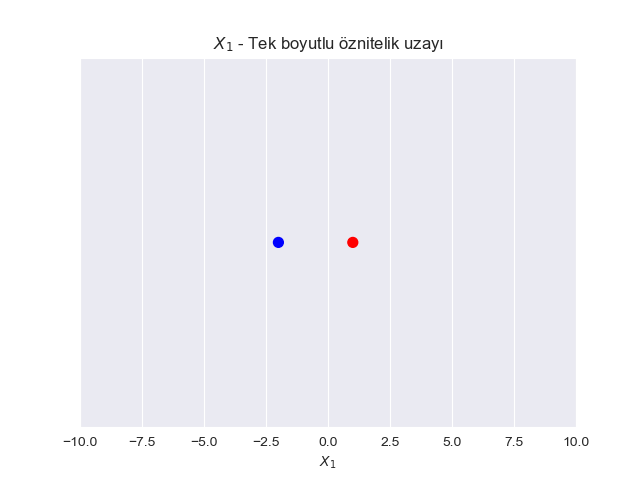

In [27]:
# Lineer olarak 
X_1 = np.array([-2,1])
y = np.array([1,0])

plt.figure()
# y eksenini yok edelim
plt.gca().get_yaxis().set_visible(False)
# mavi ve kırmızı bir colormap olsun
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_1, np.zeros(len(X_1)),c=y, s=50,cmap=cm_bright)
plt.xlabel(r"$X_1$");
plt.title(r"$X_1$ - Tek boyutlu öznitelik uzayı");
plt.xlim([-10,10]);

Bu iki noktanın diğer noktalar ile olan benzerliğini, bahsettiğimiz **"gaussian kernel"** ile tanımladığımızı düşünelim. "Gaussian Kernel"i fonksiyon haline dönüştürelim.

Fonksiyonun iki parametresi olsun, birisi $\gamma$ diğeri de kırmızı veya mavi noktanın $x_1$ üzerindeki değeri. Bu fonksiyona girdi olarak da doğru üzerinde herhangi bir noktayı verebilelim.

In [28]:
def gaussian_similarity(x, gamma = 0.1, l=1):
    return np.exp(-gamma*(x-l)**2)

<IPython.core.display.Javascript object>


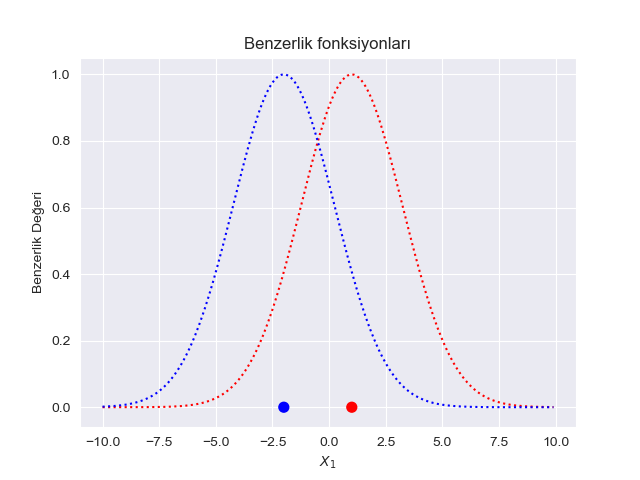

In [29]:
plt.figure()
# mavi ve kırmızı bir colormap olsun
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_1, np.zeros(len(X_1)),c=y, s=50,cmap=cm_bright)
plt.xlabel(r"$X_1$");
plt.title(r"Benzerlik fonksiyonları");

l_m=-2
l_k=1

x_array = np.arange(-10,10,0.1)
l_k_similarity = [gaussian_similarity(x,l=l_k) for x in x_array]
l_m_similarity = [gaussian_similarity(x,l=l_m) for x in x_array]

plt.plot(x_array,l_k_similarity,'r',ls=":")
plt.plot(x_array,l_m_similarity,'b',ls=":")
plt.ylabel("Benzerlik Değeri");

Bu yeni oluşturduğumuz benzerliklerin her birine yeni bir eksen diyelim. Mavi olan $l_m$, kırmızı olan $l_k$ ekseni olsun. 

$x_1$ eksenindeki bir nokta için yeni eksenlerdeki değerleri hesaplayalım. Örneğin yeni gelen noktamız 3 olsun. 3 noktasının değerleri aşağıda verilmektedir.

In [30]:
new_point = 3

l_m_sim = gaussian_similarity(3,l=l_m)
l_k_sim = gaussian_similarity(3,l=l_k)
print(l_m_sim)
print(l_k_sim)

0.0820849986238988
0.6703200460356393


<IPython.core.display.Javascript object>


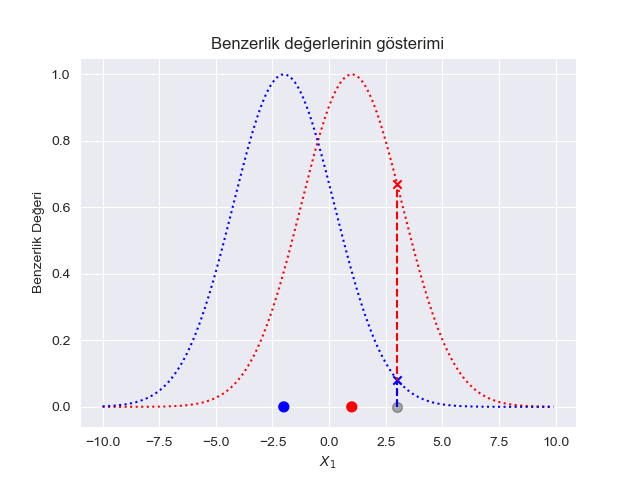

In [31]:
plt.figure()
# mavi ve kırmızı bir colormap olsun
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_1, np.zeros(len(X_1)),c=y, s=50,cmap=cm_bright)
plt.xlabel(r"$X_1$");
plt.title(r"Benzerlik değerlerinin gösterimi");

plt.plot(x_array,l_k_similarity,'r',ls=":")
plt.plot(x_array,l_m_similarity,'b',ls=":")

plt.plot([new_point,new_point],[0,l_k_sim],"r",ls="--")
plt.plot([new_point,new_point],[0,l_m_sim],"b",ls="--")
plt.scatter(new_point,0,c="k",s=50,alpha=0.3)
plt.scatter(new_point,l_k_sim,c="r",marker="x")
plt.scatter(new_point,l_m_sim,c="b",marker="x")
plt.ylabel("Benzerlik Değeri");

x eksenindeki tüm noktaları bu şekilde yeni eksenlere aktaralım.

<IPython.core.display.Javascript object>


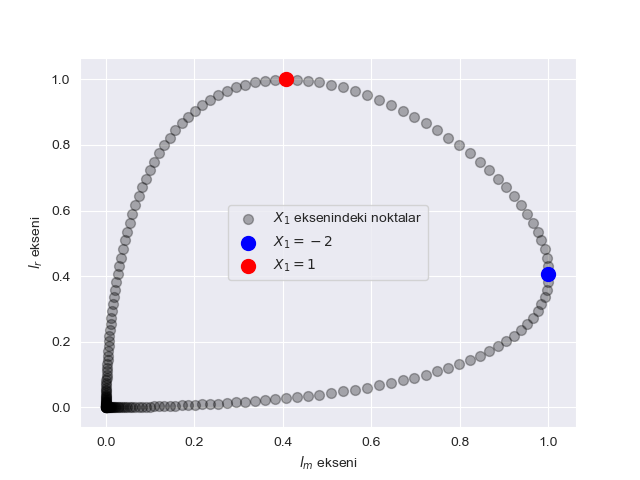

In [32]:
plt.figure()
plt.scatter(l_m_similarity,l_k_similarity,c="k",s=50,alpha=0.3)
plt.scatter(gaussian_similarity(l_m,l=l_m),gaussian_similarity(l_m,l=l_k),c="b",s=100)
plt.scatter(gaussian_similarity(l_k,l=l_m),gaussian_similarity(l_k,l=l_k),c="r",s=100)
plt.xlabel(r"$l_m$ ekseni")
plt.ylabel(r"$l_r$ ekseni")
plt.legend([r"$X_1$ eksenindeki noktalar",r"$X_1=-2$","$X_1=1$"]);

Gördüğünüz gibi tek bir boyutu iki boyuta taşıdık ve bunu yaparken lineer olmayan bir "kernel" sayesinde verileri farklı eksenlere yayabildik.

### "Kernel trick" (Kernel numarası) 

Yaptığımız 2 boyutlu örneği <span class="mark">daha yüksek boyutlara genelleyebilmek</span> mümkün. 

Elimizde m tane örneğe ve n tane özniteliğe sahip bir veri seti olduğunu düşünelim. Her bir örnek için bir "kernel" kullanırsak ve öznitelik boyut sayısını arttırırsak dönüştürülmüş verinin lineer olarak ayrılabilme şansını da arttırmış oluruz. Yani pratikte "kernel" dönüşümü sonrası $m \times n$ yerine $m \times m$'lik bir uzaya sahip oluruz.

**Eğer elimizdeki veri seti çok sayıda örneğe sahipse bu dönüşüm öznitelik sayısını arttırdığından dolayı işlem yükünü bir hayli arttırmaktadır. Bu sebeple çok büyük veri setleri için SVM kullanımı genellikle tercih edilmez.**

## SVM "Kernel" Örneği

Bir önceki yazımızda da kullandığımız ve polinom öznitelikler yardımıyla sınflandırdığımız "moon" veri setini kullanarak bir SVM "kernel" sınıflandırıcı örneği yapalım. 

<IPython.core.display.Javascript object>


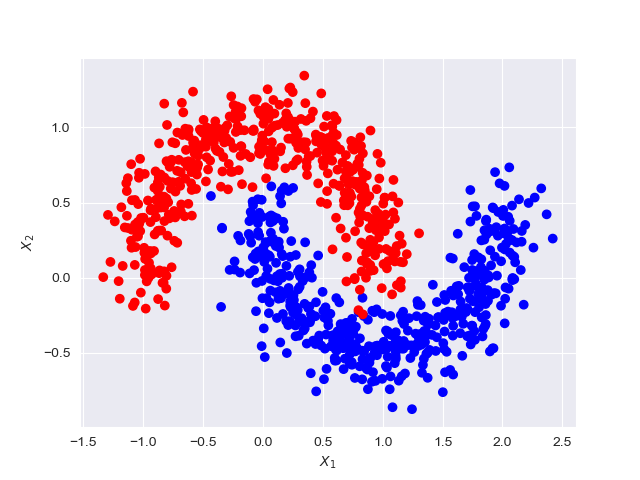

In [33]:
from sklearn.datasets import make_moons
# Spiral bir veri seti oluşturur
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)
plt.figure()
ax = plt.axes()
# veri setini görelim
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright);
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");

In [10]:
# datafloyd paketi
import sys
sys.path.append("..")
from datafloyd.plot import plot_decision_region, plot_svm_decision_region_2d

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVC

<IPython.core.display.Javascript object>


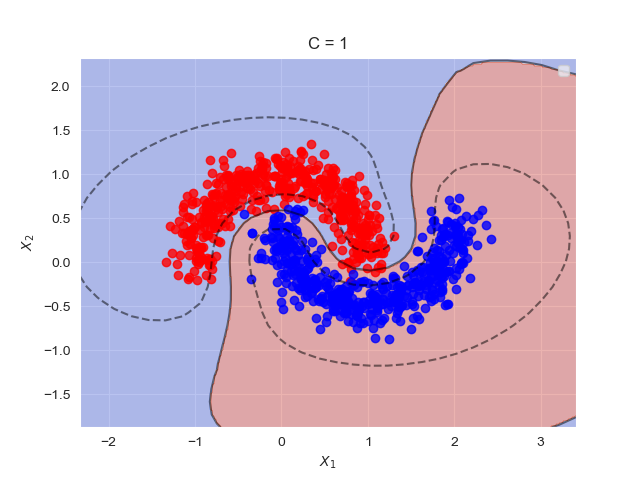

Text(0.5,1,'C = 1')

In [35]:
# Kernel olarak RBF Radial Basis Function kullanalım
C_i=1
poly_scaler_svm = Pipeline((
("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",C=C_i,random_state=42))))
poly_scaler_svm.fit(X, y);

plt.figure()
plot_decision_region(X,y,poly_scaler_svm)
plot_svm_decision_region_2d(poly_scaler_svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title("C = " + str(C_i))

### C ve $\gamma$ parametreleri ile oynayalım biraz

Şimdi biraz C ile oynayalım ve neler oluyor görelim. Önce çok büyük bir C ve sonra çok küçük bir C kullanalım

<IPython.core.display.Javascript object>


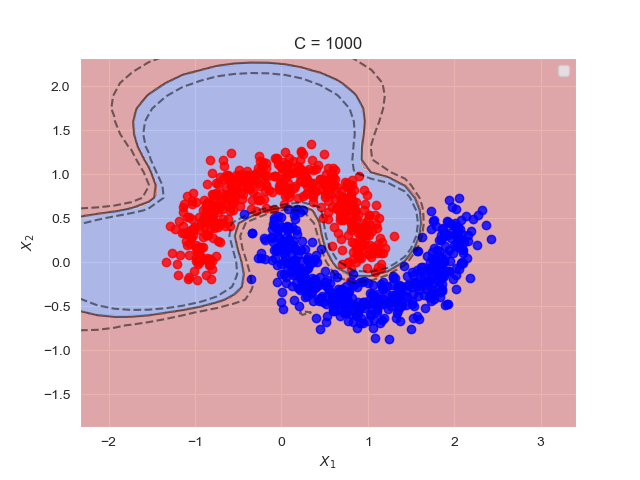

In [36]:
# Kernel olarak RBF Radial Basis Function kullanalım
C_i=1000
poly_scaler_svm = Pipeline((
("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",C=C_i,random_state=42))))
poly_scaler_svm.fit(X, y);

plt.figure()
plot_decision_region(X,y,poly_scaler_svm)
plot_svm_decision_region_2d(poly_scaler_svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title("C = " + str(C_i));

<IPython.core.display.Javascript object>


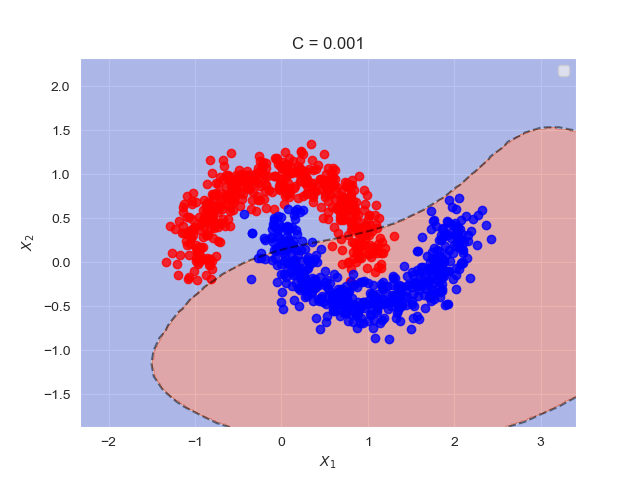

In [19]:
# Kernel olarak RBF Radial Basis Function kullanalım
C_i=0.001
poly_scaler_svm = Pipeline((
("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",C=C_i,random_state=42))))
poly_scaler_svm.fit(X, y);

plt.figure()
plot_decision_region(X,y,poly_scaler_svm)
plot_svm_decision_region_2d(poly_scaler_svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title("C = " + str(C_i));

**C büyüdükçe sınırları ayrıntılı bir şekilde çizmeye küçüldükçe ise sınırları yumuşatmaya başlıyor gibi göründü bana :)**

Şimid C=1 iken biraz da $\gamma$ parametresi ile oynayalım. 

<IPython.core.display.Javascript object>


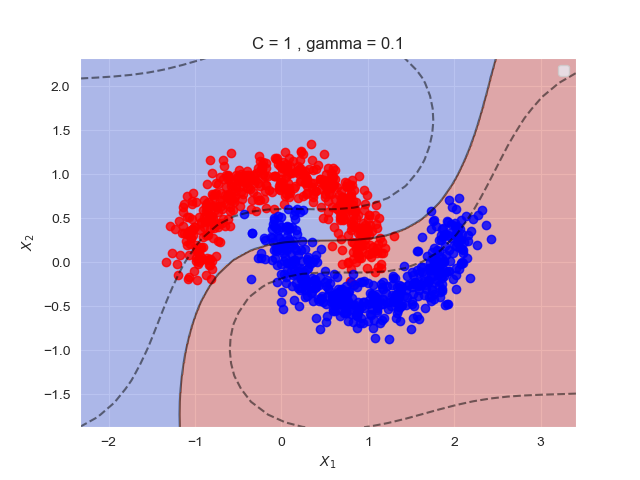

In [37]:
# Kernel olarak RBF Radial Basis Function kullanalım
C_i=1
gamma = 0.1
poly_scaler_svm = Pipeline((
("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",gamma=gamma,C=C_i,random_state=42))))
poly_scaler_svm.fit(X, y);

plt.figure()

plot_decision_region(X,y,poly_scaler_svm)
plot_svm_decision_region_2d(poly_scaler_svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title("C = " + str(C_i) + " , gamma = "  + str(gamma));

<IPython.core.display.Javascript object>


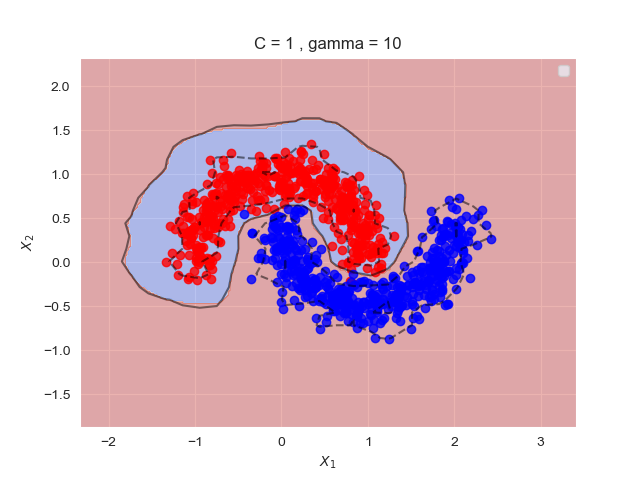

In [18]:
# Kernel olarak RBF Radial Basis Function kullanalım
C_i=1
gamma = 10
poly_scaler_svm = Pipeline((
("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",gamma=gamma,C=C_i,random_state=42))))
poly_scaler_svm.fit(X, y);

plt.figure()

plot_decision_region(X,y,poly_scaler_svm)
plot_svm_decision_region_2d(poly_scaler_svm,plot_support=False)
plt.xlabel(r"$X_1$");
plt.ylabel(r"$X_2$");
plt.title("C = " + str(C_i) + " , gamma = "  + str(gamma));

$\gamma$ değeri büyüdükçe daha ayrıntılı sınırlar olduğunu gözlemliyoruz. Küçük $\gamma$ değerleri daha yumuşak sınırlar oluşturmakta

Bir başka yazımızda görüşmek üzere kendinize iyi bakın!